Write a program to implement the multinomial  naïve bayesian classifier for a sample training data set stored as a .CSV file. Compute the confusion matrix,accuracy,precision and recall of the classifier, considering few test data sets

Decision Tree: {'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


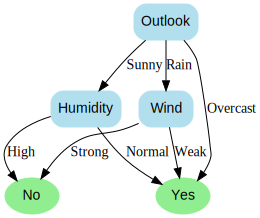

Prediction: No


In [1]:
import math
import pandas as pd

# ---------- Entropy ----------
def entropy(data, target):
    values = data[target].unique()
    ent = 0
    for value in values:
        prob = len(data[data[target] == value]) / len(data)
        ent -= prob * math.log2(prob)
    return ent

# ---------- Information Gain ----------
def info_gain(data, attribute, target):
    total_entropy = entropy(data, target)
    values = data[attribute].unique()
    subset_entropy = 0
    for value in values:
        subset = data[data[attribute] == value]
        prob = len(subset) / len(data)
        subset_entropy += prob * entropy(subset, target)
    return total_entropy - subset_entropy
# ---------- ID3 Algorithm ----------
def id3(data, target, attributes=None):
    if attributes is None:
        attributes = list(data.columns)
        attributes.remove(target)

    # Case 1: All labels are same
    if len(data[target].unique()) == 1:
        return data[target].iloc[0]

    # Case 2: No attributes left → return majority class
    if len(attributes) == 0:
        return data[target].mode()[0]

    # Pick best attribute
    gains = [info_gain(data, attr, target) for attr in attributes]
    best_attr = attributes[gains.index(max(gains))]

    tree = {best_attr: {}}
     # Build branches
    for value in data[best_attr].unique():
        subset = data[data[best_attr] == value]
        if subset.empty:
            tree[best_attr][value] = data[target].mode()[0]
        else:
            new_attrs = attributes.copy()
            new_attrs.remove(best_attr)
            tree[best_attr][value] = id3(subset, target, new_attrs)

    return tree
# ---------- Classify ----------
def classify(tree, sample):
    if not isinstance(tree, dict): # Leaf node
        return tree
    attribute = next(iter(tree))
    value = sample[attribute]
    if value in tree[attribute]:
        return classify(tree[attribute][value], sample)
    else:
        return None

# ---------- Example Dataset with 2 attributes ----------
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

df = pd.DataFrame(data)

# Train ID3
decision_tree = id3(df, 'Play')
print("Decision Tree:", decision_tree)

from graphviz import Digraph

def plot_tree(tree_dict, parent=None, edge_label=None, dot=None):
    if dot is None:
        dot = Digraph()
        dot.attr('node', shape='box', style='rounded,filled', color='lightblue2', fontname="helvetica")

    # If the node is a leaf (string class label)
    if isinstance(tree_dict, str):
        node_id = str(id(tree_dict))
        dot.node(node_id, tree_dict, shape='ellipse', color='lightgreen')
        if parent:
            dot.edge(parent, node_id, label=edge_label)
        return dot

    # Otherwise, it's a dict with feature as key
    feature = list(tree_dict.keys())[0]
    node_id = str(id(tree_dict))
    dot.node(node_id, feature)
    if parent:
        dot.edge(parent, node_id, label=edge_label)

    # Recurse for children
    for value, subtree in tree_dict[feature].items():
        plot_tree(subtree, parent=node_id, edge_label=str(value), dot=dot)

    return dot

# Generate and display in Colab
dot = plot_tree(decision_tree)
from IPython.display import display
display(dot)

#test sample
test_sample = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temp': ['Cool'],
    'Humidity': ['High'],
    'Wind': ['Weak']
})
output = classify(decision_tree, test_sample.iloc[0])
print("Prediction:", output)



